In [97]:
# Import libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

# Load the datasets
data2D = pd.read_csv('data2D.csv').values
data1000D = pd.read_csv('data1000D.csv').values

# Define the functions for the methods

# Buggy PCA: PCA applied directly on the matrix X
def buggy_pca(X, d):
  # Compute the covariance matrix of X
  C = np.cov(X.T)
  # Perform eigenvalue decomposition on C
  D, V = np.linalg.eig(C)
  # Sort the eigenvalues and eigenvectors in descending order
  idx = np.argsort(D)[::-1]
  D = D[idx]
  V = V[:, idx]
  # Select the first d columns of V
  Vt = V[:, :d]
  # Project X onto A
  Z = X @ Vt
  # Reconstruct X from Z
  X_recon = Z @ Vt.T 
  # Return Z, A, b and X_recon
  return Z, Vt, X_recon

# Demeaned PCA: Subtract the mean along each dimension before applying PCA
def demeaned_pca(X, d):
  # Compute the mean of X along each column
  X_mean = np.mean(X, axis=0)
  # Subtract the mean from X
  X_demeaned = X - X_mean
  # Compute the covariance matrix of X
  C = np.cov(X_demeaned.T)
  # Perform eigenvalue decomposition on C
  D, V = np.linalg.eig(C)
  # Sort the eigenvalues and eigenvectors in descending order
  idx = np.argsort(D)[::-1]
  D = D[idx]
  V = V[:, idx]
  # Select the first d columns of V
  Vt = V[:, :d]
  # Project X onto A
  Z = X_demeaned @ Vt
  # Reconstruct X from Z
  X_demeaned_recon = Z @ Vt.T
  # Add the mean back to X_demeaned_recon
  X_recon = X_demeaned_recon + X_mean
  # Return Z, A, b and X_recon
  return Z, Vt, X_recon
    
    
# Normalized PCA: Subtract the mean and scale each dimension so that the sample mean and standard deviation along each dimension is 0 and 1 respectively
def normalized_pca(X, d):
  # Standardize X using StandardScaler from sklearn
  scaler = StandardScaler()
  #X_normalized = scaler.fit_transform(X)
  mean = np.mean(X, axis=0)
  std_dev = np.std(X, axis=0)
  X_normalized = (X - mean) / std_dev
  # Compute the covariance matrix of X
  C = np.cov(X_normalized.T)
  # Perform eigenvalue decomposition on C
  D, V = np.linalg.eig(C)
  # Sort the eigenvalues and eigenvectors in descending order
  idx = np.argsort(D)[::-1]
  D = D[idx]
  V = V[:, idx]
  # Select the first d columns of V
  Vt = V[:, :d]
  # Project X onto A
  Z = X_normalized @ Vt
  # Reconstruct X from Z
  X_normalized_recon = Z @ Vt.T
  # Add the mean back to X_demeaned_recon
  #X_recon = scaler.inverse_transform(X_normalized_recon)
  X_recon = X_normalized_recon * std_dev + mean
  # Return Z, A, b and X_recon
  return Z, Vt, X_recon

# DRO: Dimensionality Reduction via Orthogonalization
def dro(X, d):
  # Compute the covariance matrix of X
  C = np.cov(X.T)
  # Perform eigenvalue decomposition on C
  D, V = np.linalg.eig(C)
  # Sort the eigenvalues and eigenvectors in descending order
  idx = np.argsort(D)[::-1]
  D = D[idx]
  V = V[:, idx]
  # Select the first d columns of V
  A = V[:, :d]
  # Compute the bias term b
  b = np.mean(X, axis=0) - A @ A.T @ np.mean(X, axis=0)
  # Project X onto A
  Z = X @ A
  # Reconstruct X from Z
  X_recon = Z @ A.T + b
  # Return Z, A, b and X_recon
  return Z, A, b, X_recon


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


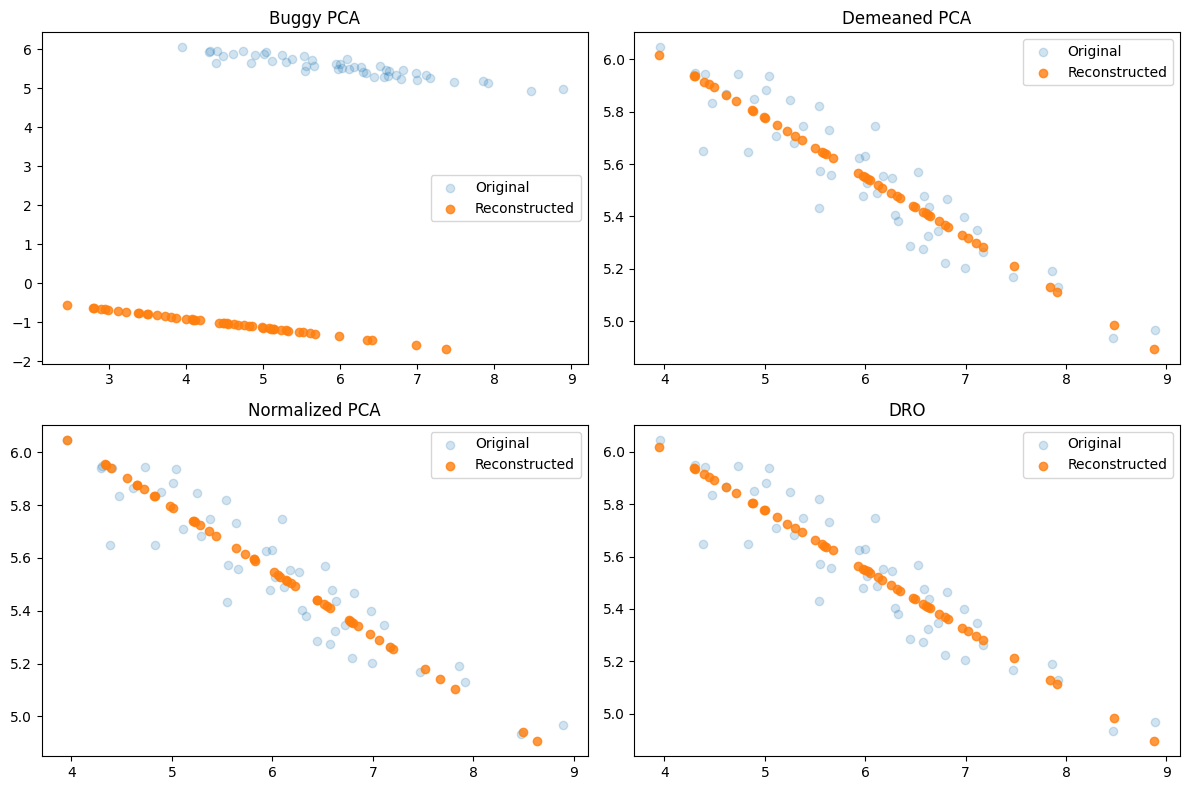

In [98]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd

# Load the 2D dataset
data2D = pd.read_csv('data2D.csv').values

# Perform the four methods on the data
Z_buggy, Vt_buggy, X_recon_buggy = buggy_pca(data2D, 1)
Z_demeaned, Vt_demeaned, X_recon_demeaned = demeaned_pca(data2D, 1)
Z_normalized, Vt_normalized, X_recon_normalized = normalized_pca(data2D, 1)
Z_dro, A_dro, b_dro, X_recon_dro = dro(data2D, 1)

# Plot the original and reconstructed points for each method
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(data2D[:, 0], data2D[:, 1], alpha=0.2, label='Original')
plt.scatter(X_recon_buggy[:, 0], X_recon_buggy[:, 1], alpha=0.8, label='Reconstructed')
plt.title('Buggy PCA')
plt.legend()
plt.subplot(2, 2, 2)
plt.scatter(data2D[:, 0], data2D[:, 1], alpha=0.2, label='Original')
plt.scatter(X_recon_demeaned[:, 0], X_recon_demeaned[:, 1], alpha=0.8, label='Reconstructed')
plt.title('Demeaned PCA')
plt.legend()
plt.subplot(2, 2, 3)
plt.scatter(data2D[:, 0], data2D[:, 1], alpha=0.2, label='Original')
plt.scatter(X_recon_normalized[:, 0], X_recon_normalized[:, 1], alpha=0.8, label='Reconstructed')
plt.title('Normalized PCA')
plt.legend()
plt.subplot(2, 2, 4)
plt.scatter(data2D[:, 0], data2D[:, 1], alpha=0.2, label='Original')
plt.scatter(X_recon_dro[:, 0], X_recon_dro[:, 1], alpha=0.8, label='Reconstructed')
plt.title('DRO')
plt.legend()
plt.tight_layout()
plt.savefig("ORIGINAL_VS_RECONSTRUCTED.eps")
plt.show()


C:\Users\Subham Sabud\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Subham Sabud\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


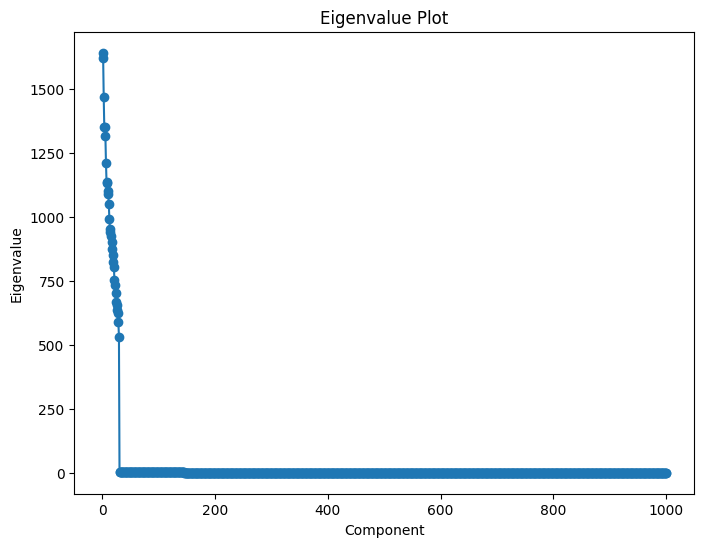

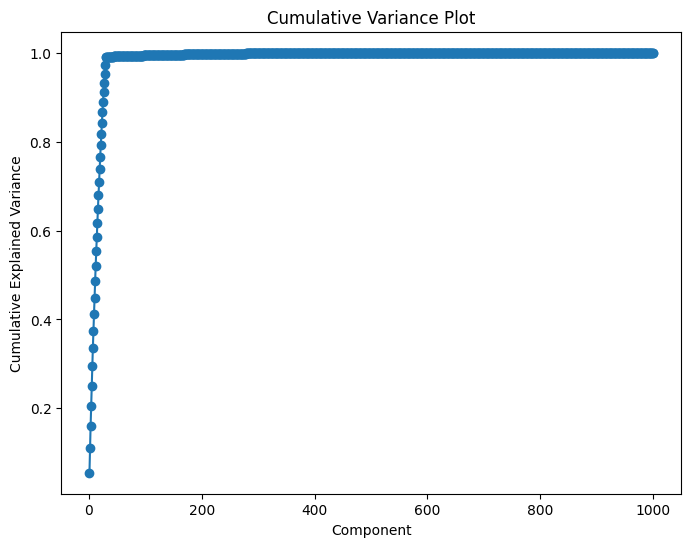

In [99]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Load the 1000D dataset
data1000D = pd.read_csv('data1000D.csv')

# Compute the covariance matrix of the data
C = np.cov(data1000D.T)

# Perform eigenvalue decomposition on C
D, V = np.linalg.eig(C)

# Sort the eigenvalues and eigenvectors in descending order
idx = np.argsort(D)[::-1]
D = D[idx]
V = V[:, idx]

# Plot the eigenvalue plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(D) + 1), D, marker='o')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalue Plot')
plt.savefig("EIGENVALUE_ELBOW.eps")
plt.show()

# Plot the cumulative variance plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(D) + 1), np.cumsum(D) / np.sum(D), marker='o')
plt.xlabel('Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot')
plt.savefig("CUM_VAR.eps")
plt.show()


In [100]:
D

array([ 1.64323139e+03+0.00000000e+00j,  1.62295999e+03+0.00000000e+00j,
        1.46989197e+03+0.00000000e+00j,  1.35386746e+03+0.00000000e+00j,
        1.35328335e+03+0.00000000e+00j,  1.31656138e+03+0.00000000e+00j,
        1.21253294e+03+0.00000000e+00j,  1.13740827e+03+0.00000000e+00j,
        1.13333689e+03+0.00000000e+00j,  1.10217110e+03+0.00000000e+00j,
        1.09160072e+03+0.00000000e+00j,  1.05322361e+03+0.00000000e+00j,
        9.92819702e+02+0.00000000e+00j,  9.53830585e+02+0.00000000e+00j,
        9.42114075e+02+0.00000000e+00j,  9.25732983e+02+0.00000000e+00j,
        9.03075103e+02+0.00000000e+00j,  8.75448330e+02+0.00000000e+00j,
        8.53195307e+02+0.00000000e+00j,  8.23341950e+02+0.00000000e+00j,
        8.02924498e+02+0.00000000e+00j,  7.54814973e+02+0.00000000e+00j,
        7.36102930e+02+0.00000000e+00j,  7.04842330e+02+0.00000000e+00j,
        6.69852073e+02+0.00000000e+00j,  6.55283865e+02+0.00000000e+00j,
        6.36161100e+02+0.00000000e+00j,  6.24178601

In [101]:
# Import libraries
import numpy as np
import pandas as pd
from numpy.linalg import norm
from sklearn.preprocessing import StandardScaler
# Define a function to calculate the reconstruction error
def reconstruction_error(X, X_recon):
  # Compute the squared sum of differences between X and X_recon
  error = np.sum(norm(X - X_recon)**2, axis=0)/(X.shape[0])
  # Return the error
  return error

# Load the datasets
data2D = pd.read_csv('data2D.csv').values
data1000D = pd.read_csv('data1000D.csv').values

# Perform the four methods on the data
Z_buggy, Vt_buggy, X_recon_buggy = buggy_pca(data2D, 1)
Z_demeaned, Vt_demeaned, X_recon_demeaned = demeaned_pca(data2D, 1)
Z_normalized, Vt_normalized, X_recon_normalized = normalized_pca(data2D, 1)
Z_dro, A_dro, b_dro, X_recon_dro = dro(data2D, 1)

# Calculate the reconstruction errors for the 2D dataset
error_buggy_2D = reconstruction_error(data2D, X_recon_buggy)
error_demeaned_2D = reconstruction_error(data2D, X_recon_demeaned)
error_normalized_2D = reconstruction_error(data2D, X_recon_normalized)
error_dro_2D = reconstruction_error(data2D, X_recon_dro)

# Choose d for the 1000D dataset based on the scree plot or the cumulative variance plot
d = 31

# Perform the four methods on the data
Z_buggy, Vt_buggy, X_recon_buggy = buggy_pca(data1000D, d)
Z_demeaned, Vt_demeaned, X_recon_demeaned = demeaned_pca(data1000D, d)
Z_normalized, Vt_normalized, X_recon_normalized = normalized_pca(data1000D, d)
Z_dro, A_dro, b_dro, X_recon_dro = dro(data1000D, d)

# Calculate the reconstruction errors for the 1000D dataset
error_buggy_1000D = reconstruction_error(data1000D, X_recon_buggy)
error_demeaned_1000D = reconstruction_error(data1000D, X_recon_demeaned)
error_normalized_1000D = reconstruction_error(data1000D, X_recon_normalized)
error_dro_1000D = reconstruction_error(data1000D, X_recon_dro)


In [111]:
error_buggy_2D

45.471206855583894

In [112]:
error_buggy_1000D

499733.0503798521

In [113]:
error_dro_2D

0.009960281682916333

In [114]:
error_normalized_2D

0.048449432644390486

In [115]:
error_demeaned_2D

0.009960281682916317

In [116]:
error_dro_1000D

271.39479904836617

In [117]:
error_normalized_1000D

272.05697007695886

In [118]:
error_demeaned_1000D 

271.3947990483661